In [2]:
import  pandas as pd # to load and manipulate data and for one hot encoding
import numpy as np # to calculate the mean and standard deviation 
import matplotlib.pyplot as plt # to draw graphs
from sklearn.tree import DecisionTreeClassifier  # to build the classification Tree
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.model_selection import train_test_split # to split the data into train and test
from sklearn.model_selection import cross_val_score # for cross validation
from sklearn.metrics import confusion_matrix # to create a confusion matrix
#from sklearn.metrics import plot_confusion_matrix # to d

In [3]:
df = pd.read_csv('E:\MLprojects\decision_tree\heart+disease\processed.cleveland.data', header=None)
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\NIRANJAN S\AppData\Local\Temp\ipykernel_10488\1430344634.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv('E:\MLprojects\decision_tree\heart+disease\processed.cleveland.data', header=None)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## columns with descriptions
1. age
2. sex
3. cd - chest pain
4. restbp - resting blood pressure (in mm Hg)
5. chol - serum cholesterol im mg/dl
6. fbs - fasting blood sugar
7. restecg - resting electrocardographic results
8. thalach - maxmum heart rate achieved
9. thalac - maximum heart rate achived
10. exang - exercise induced angina
11. oldpeak - ST depresson nduced by exercise relative to rest
12. slope - the slope of the peak exercise ST segment
13. thal - this is short of thallum heart scan
14. hd - diagnosis of heart disease, the predicted attribute

In [4]:
df.columns=['age','sex','cp','restbp','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [6]:
df['ca'].value_counts()

ca
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: count, dtype: int64

In [7]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [8]:
print(df.loc[(df['ca']=='?') | (df['thal'] =='?')])
len(df.loc[(df['ca']=='?') | (df['thal'] =='?')])

      age  sex   cp  restbp   chol  fbs  restecg  thalach  exang  oldpeak  \
87   53.0  0.0  3.0   128.0  216.0  0.0      2.0    115.0    0.0      0.0   
166  52.0  1.0  3.0   138.0  223.0  0.0      0.0    169.0    0.0      0.0   
192  43.0  1.0  4.0   132.0  247.0  1.0      2.0    143.0    1.0      0.1   
266  52.0  1.0  4.0   128.0  204.0  1.0      0.0    156.0    1.0      1.0   
287  58.0  1.0  2.0   125.0  220.0  0.0      0.0    144.0    0.0      0.4   
302  38.0  1.0  3.0   138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca thal  hd  
87     1.0  0.0    ?   0  
166    1.0    ?  3.0   0  
192    2.0    ?  7.0   1  
266    2.0  0.0    ?   2  
287    2.0    ?  7.0   0  
302    1.0    ?  3.0   0  


6

In [9]:
df.shape

(303, 14)

In [10]:
df_no_missing_value=df.loc[(df['ca']!='?') & (df['thal'] !='?')]
print("len of non missing value",len(df.loc[(df['ca']!='?') & (df['thal'] !='?')]))
df_no_missing_value.head()


len of non missing value 297


,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [11]:
df_no_missing_value.shape

(297, 14)

In [12]:
df_no_missing_value['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [13]:
df_no_missing_value['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [14]:
X= df_no_missing_value.drop('hd', axis = 1)
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [15]:
y = df_no_missing_value['hd']
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

In [16]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

In [17]:
X['cp'].unique()

array([1., 4., 3., 2.])

In [18]:
pd.get_dummies(X,columns=['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,True,False,False,False
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,False,False,False,True
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,False,False,True,False
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,False,True,False,False


In [19]:
X_encoded= pd.get_dummies(X, columns=['cp','restecg','slope','thal'])
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,True,...,False,False,False,True,False,False,True,False,True,False
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,False,...,True,False,False,True,False,True,False,True,False,False
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,False,...,True,False,False,True,False,True,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,False,...,False,True,False,False,False,False,True,True,False,False
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,False,...,False,False,False,True,True,False,False,True,False,False


In [20]:
y.unique()

array([0, 2, 1, 3, 4])

In [21]:
y_not_zero_index = y>0
print(y_not_zero_index)
y[y_not_zero_index] = 1
print(y)
y.unique()

0      False
1       True
2       True
3      False
4      False
       ...  
297     True
298     True
299     True
300     True
301     True
Name: hd, Length: 297, dtype: bool
0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: hd, Length: 297, dtype: int64


C:\Users\NIRANJAN S\AppData\Local\Temp\ipykernel_10488\3198945654.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y_not_zero_index] = 1
C:\Users\NIRANJAN S\AppData\Local\Temp\ipykernel_10488\3198945654.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y_not_zero_index] = 1


array([0, 1])

Build A Preliminary Classification tree

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y , random_state=42)

clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train,y_train)

[Text(0.5732758620689655, 0.9583333333333334, 'x[8] <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No HD'),
 Text(0.33189655172413796, 0.875, 'x[21] <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No HD'),
 Text(0.4525862068965517, 0.9166666666666667, 'True  '),
 Text(0.2025862068965517, 0.7916666666666666, 'x[7] <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80.0, 13.0]\nclass = No HD'),
 Text(0.14655172413793102, 0.7083333333333334, 'x[0] <= 58.5\ngini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No HD'),
 Text(0.08620689655172414, 0.625, 'x[3] <= 311.5\ngini = 0.061\nsamples = 63\nvalue = [61, 2]\nclass = No HD'),
 Text(0.05172413793103448, 0.5416666666666666, 'x[2] <= 109.0\ngini = 0.033\nsamples = 60\nvalue = [59, 1]\nclass = No HD'),
 Text(0.034482758620689655, 0.4583333333333333, 'x[1] <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = No HD'),
 Text(0.017241379310344827, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = No HD'),
 

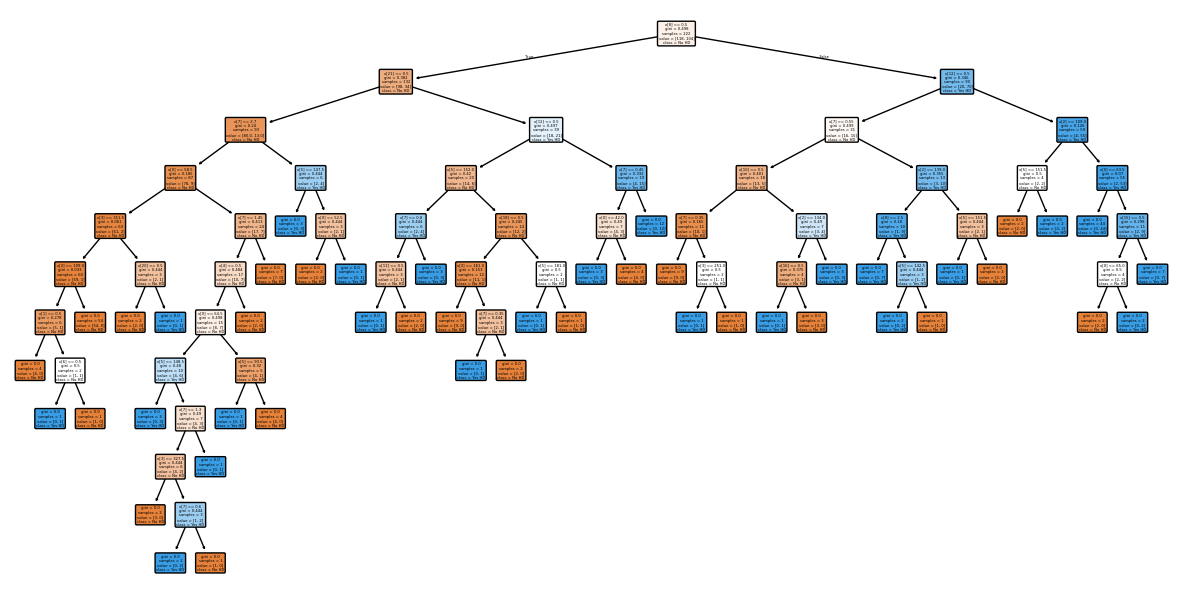

In [23]:
plt.figure(figsize=[15,7.5])
plot_tree(clf_dt, filled=True, rounded=True, class_names= ["No HD", 'Yes HD'])

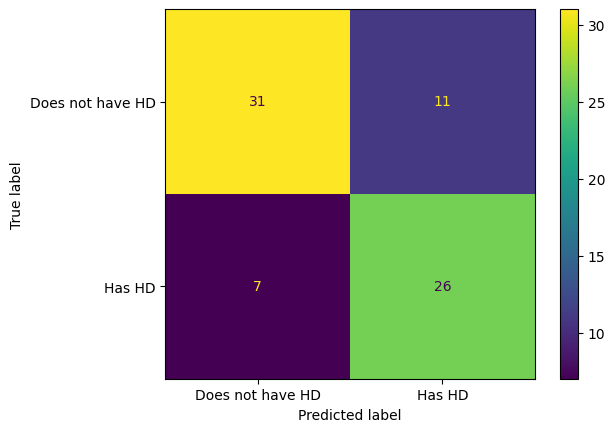

In [24]:
## plot_confusion_matrix() will run the test data down the tree adn draw
## a confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions
y_pred = clf_dt.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Does not have HD", "Has HD"])
disp.plot()


## Cost Complexity Pruning Part 1: Visualize alpha

In [25]:
path = clf_dt.cost_complexity_pruning_path(X_train,y_train) # determine value for alpha
ccp_alphas =path.ccp_alphas
ccp_alphas = ccp_alphas[:-1] # exclude the maximum value for alpha

clf_dts = [] # create an array that we will put decision Trees Into

# Now create one decision tree per value for alpha and state it in the array
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)


In [26]:
clf_dts

[DecisionTreeClassifier(ccp_alpha=np.float64(0.0), random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0029529529529529544),
                        random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.003861003861003862),
                        random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.004054054054054055),
                        random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.004095004095004095),
                        random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.004293579293579285),
                        random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.005148005148005148),
                        random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.005412976001211295),
                        random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.005787605787605791),
                        random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.006006006006

Figure(640x480)


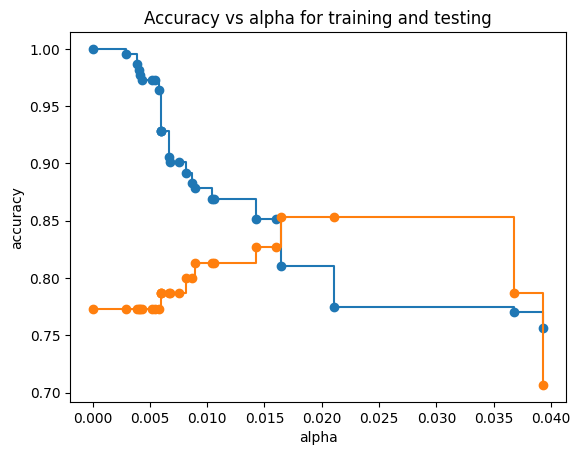

In [36]:
train_scores = [clf_dt.score(X_train,y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax=plt.subplots()
print(fig)
ax.set_xlabel("alpha")
ax.set_ylabel('accuracy')
ax.set_title("Accuracy vs alpha for training and testing")
ax.plot(ccp_alphas,train_scores, marker='o', label='trian', drawstyle = 'steps-post')
ax.plot(ccp_alphas,test_scores, marker='o', label='test', drawstyle = 'steps-post')


## Cross validatiion

[0.53333333 0.86666667 0.75       0.75       0.77272727]


<Axes: xlabel='tree'>

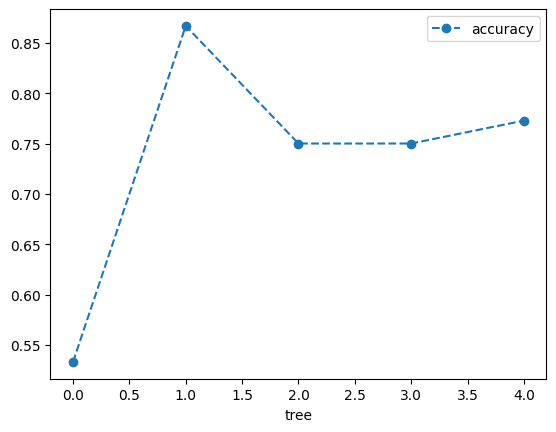

In [32]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)
## Now we use 5 fold cre=oss validation create 5 different training and testing datasets that are then used to train and test the tree
scores = cross_val_score(clf_dt, X_train,y_train, cv=5)
print(scores)
df= pd.DataFrame(data={'tree':range(5), 'accuracy':scores})
df.plot(x='tree',y='accuracy',marker='o', linestyle ='--')

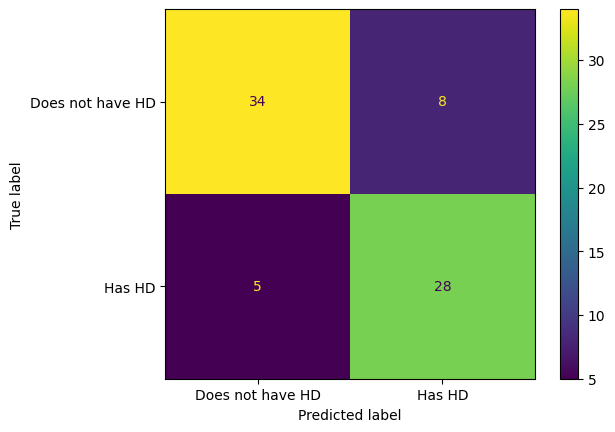

In [34]:
clf_dt=clf_dt.fit(X_train,y_train)
# Generate predictions
y_pred = clf_dt.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Does not have HD", "Has HD"])
disp.plot()

[Text(0.5769230769230769, 0.875, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No HD'),
 Text(0.3076923076923077, 0.625, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No HD'),
 Text(0.4423076923076923, 0.75, 'True  '),
 Text(0.15384615384615385, 0.375, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80.0, 13.0]\nclass = No HD'),
 Text(0.07692307692307693, 0.125, 'gini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No HD'),
 Text(0.23076923076923078, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = Yes HD'),
 Text(0.46153846153846156, 0.375, 'cp_4.0 <= 0.5\ngini = 0.497\nsamples = 39\nvalue = [18, 21]\nclass = Yes HD'),
 Text(0.38461538461538464, 0.125, 'gini = 0.42\nsamples = 20\nvalue = [14, 6]\nclass = No HD'),
 Text(0.5384615384615384, 0.125, 'gini = 0.332\nsamples = 19\nvalue = [4, 15]\nclass = Yes HD'),
 Text(0.8461538461538461, 0.625, 'cp_4.0 <= 0.5\ngini = 0.346\nsamples = 90\nvalue = [20, 70]\nclass = Yes HD'),
 

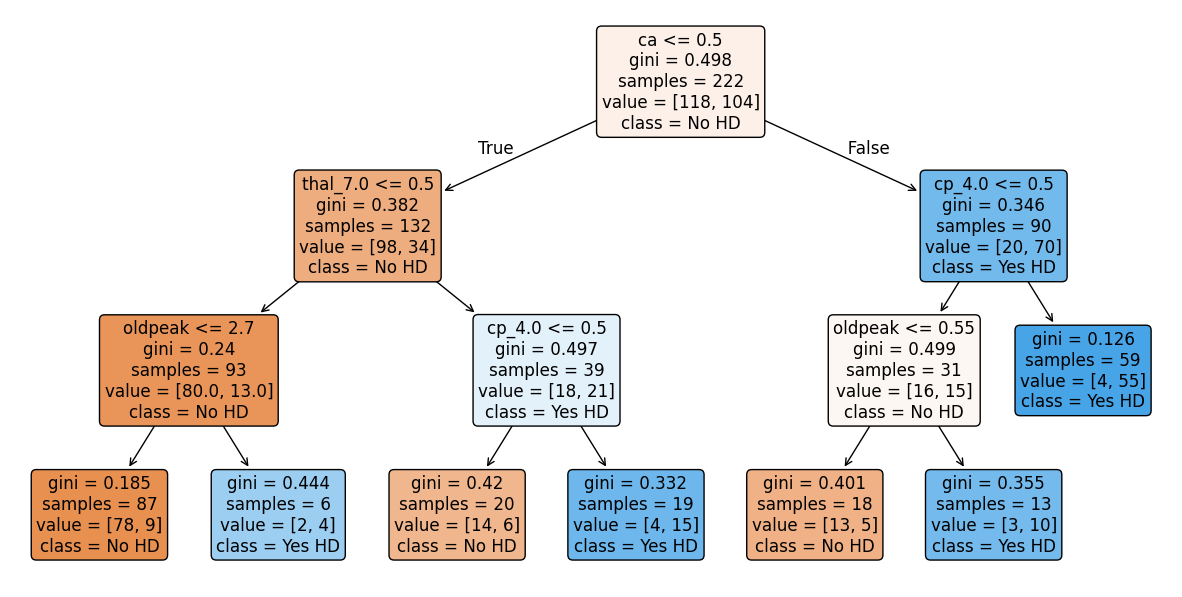

In [35]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt, filled=True, rounded=True, class_names=['No HD', 'Yes HD'], feature_names=X_encoded.columns)